# Devanagari Character Recognition

### --Defining the Problem--

### Can we recognize the Devanagari characters using AI?

#### Goals
    - Recognize the ancient Devangari characters 

In [1]:
#Importing libraries

#Analysis libraries
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '../src/')

from features import build_features as bf

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
from visualization import visualize as vs

In [3]:
#Sckit learn
from sklearn.model_selection import train_test_split

In [4]:
#Tensorflow libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from models import train_model as tm

### --Loading the Data--

 <i> The get_data helper function reshapes the csv file into</i> <br>
  <i> 32x32 pixel numpy arrays and returns the data and labels</i>

In [5]:
char_data, char_labels = bf.get_data()

In [6]:
print(len(np.unique(char_labels))) #Perfect we have 46 classes

46


In [7]:
#92000 Examples to train and test our solutions
char_data.shape

(92000, 32, 32)

### --Data Visualization--

 <i>The visualization helper function uses seaborn in the backend.</i>

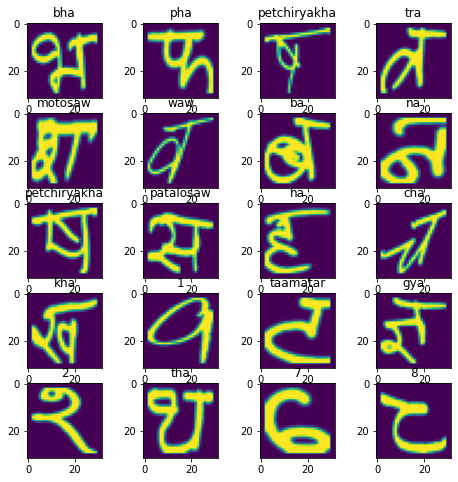

In [8]:
vs.visualization(char_data, char_labels)

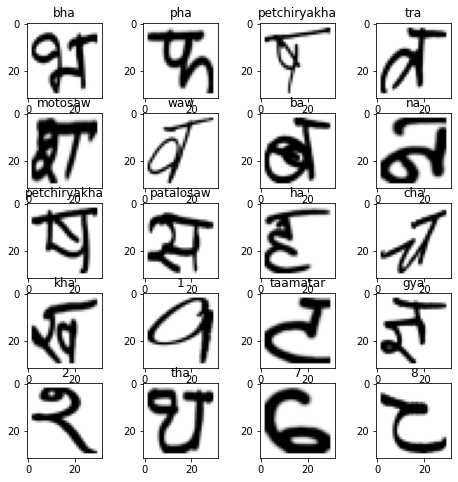

In [9]:
vs.visualization(char_data,char_labels, isBinary=True)

### --Preprocessing the data--

<i> Getting our data in the range from 0 to 1 and extracting the classes from the data.</i>


In [8]:
char_data, char_labels, classes = bf.pre_processing(char_data, char_labels)

In [9]:
classes

array(['ka', 'kha', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', 'yna',
       'taamatar', 'thaa', 'daa', 'dhaa', 'adna', 'tabala', 'tha', 'da',
       'dha', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la',
       'waw', 'motosaw', 'petchiryakha', 'patalosaw', 'ha', 'chhya',
       'tra', 'gya', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
      dtype=object)

<i> Saving our class labels to use it later for predictions </i>

In [10]:
classes = pd.DataFrame(classes)
classes.columns = ['labels']

In [11]:
classes.to_csv('../src/features/class_labels.csv')

### --Splitting the data into train/val/test split into 70/15/15--

In [12]:
char_data_train, char_data_test, char_labels_train, char_labels_test = train_test_split(char_data, char_labels, 
                                                                                        test_size=0.3, random_state=42)

In [13]:
char_data_val, char_data_test, char_labels_val, char_labels_test = train_test_split(char_data_test, char_labels_test, 
                                                                                        test_size=0.5, random_state=42)

In [14]:
print(len(char_data_train))
print(len(char_data_val))
print(len(char_data_test))

64400
13800
13800


### -- Hypothesizing Models--

### 1. A Simple DNN

<i> We are going to start with a simple Densly connected Neural Network (DNN) model and test out different layers such as 1024, 512 and 128 </i>

### 2. CNN with HyperParametr tuning

<i> Convolution Neural Networks(CNN) are know to work best with Image data. We are going to build CNN's with different hyperparameters and test them out. </i>

### --Building Models--

In [17]:
#1. A Simple DNN Model
tm.dnn_model(training=(char_data_train, char_labels_train),
            test=(char_data_test, char_labels_test),
            val=(char_data_val, char_labels_val))
# loss 	accuracy 	layer
# 0 	3.012618 	0.853333 	1024.0
# 1 	3.008728 	0.857029 	512.0
# 2 	3.196688 	0.668768 	128.0

 ![0](../reports/performance/DNN_1024_layer.png)

 ![1](../reports/performance/DNN_512_layer.png)


 ![2](../reports/performance/DNN_128_layer.png)


In [1]:
#2. CNN With HyperParameter Tuning
tm.cnn_model(train=(char_data_train, char_labels_train),
            test=(char_data_test, char_labels_test),
            val=(char_data_val, char_labels_val), epochs=100)
#  	loss 	accuracy 	layer
# 0 	0.089015 	0.974710 	128.0
# 1 	0.221300 	0.940870 	64.0
# 2 	1.114612 	0.742971 	32.0

![0](../reports/performance/CNN_128_filter.png)

![0](../reports/performance/CNN_64_filter.png)

![0](../reports/performance/CNN_32_filter.png)

### --Evaluating the models--

#### For the first model the best accuracy we got is 85.7% using one Dense layer with 512 units

### For the second model the best accuracy we got is 97.5% with CNN filters of 128,64,32